# EDA

## MRI

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the file
df = pd.read_csv('TotalMRI_Timeseries.csv')
df.head()

,Region,Region Name,Org Code,Provider name,Type of Hospital,Date,Total MRI Scans,Total Prostate MRI
0,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,NHS,01/04/2016,1095.0,55
1,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,NHS,01/05/2016,865.0,43
2,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,NHS,01/06/2016,610.0,31
3,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,NHS,01/07/2016,470.0,24
4,Y54,NaN,REM,Aintree University Hospital NHS Foundation Trust,NHS,01/08/2016,395.0,20


### Yearly MRI Growth

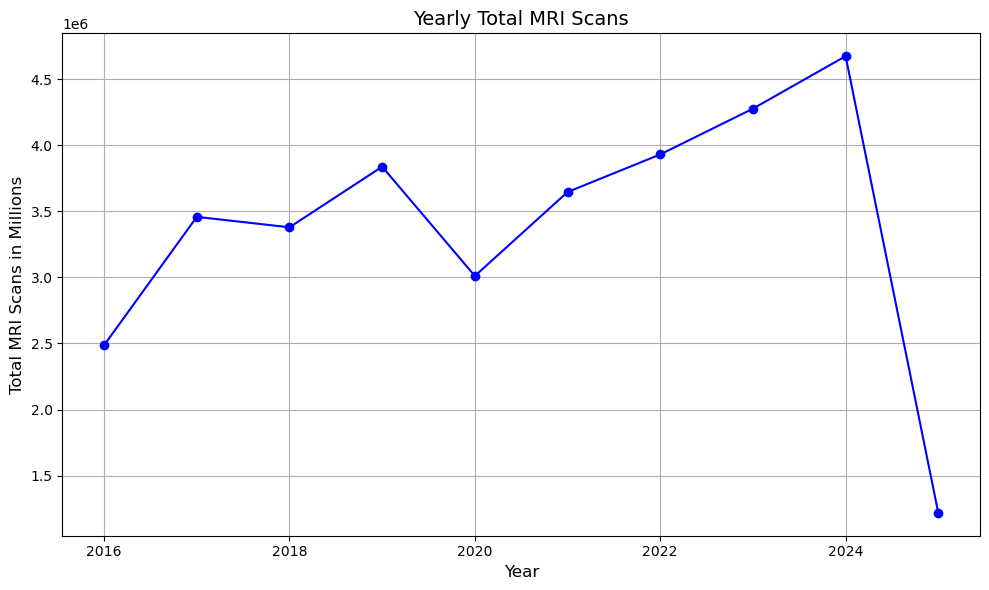

In [4]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Convert 'Total MRI Scans' to numeric (in case of missing or non-numeric values)
df['Total MRI Scans'] = pd.to_numeric(df['Total MRI Scans'], errors='coerce')

# Group data by year and sum the Total MRI Scans
yearly_total_mri = df.groupby(df['Date'].dt.year)['Total MRI Scans'].sum()

# Plot the yearly trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_total_mri.index, yearly_total_mri.values, marker='o', linestyle='-', color='blue')
plt.title("Yearly Total MRI Scans", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total MRI Scans in Millions", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Monthly MRI Growth

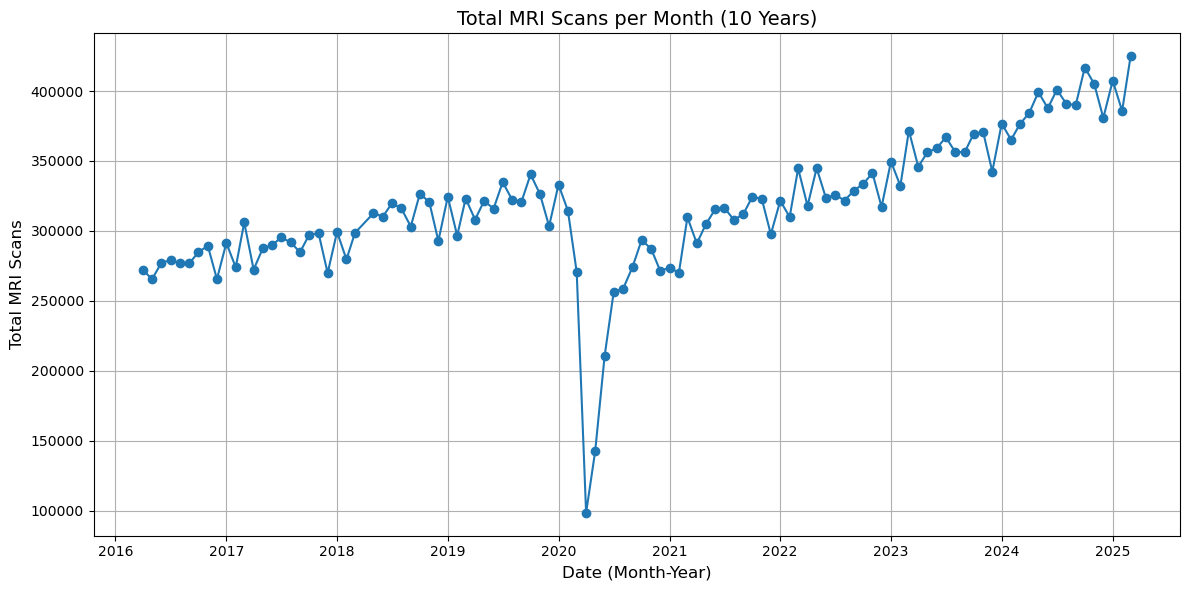

In [5]:

# Group by month and year
df_grouped = df.groupby(df['Date'].dt.to_period("M"))['Total MRI Scans'].sum()

# Convert to DataFrame and reset index for plotting
df_grouped = df_grouped.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-')
plt.title("Total MRI Scans per Month (10 Years)", fontsize=14)
plt.xlabel("Date (Month-Year)", fontsize=12)
plt.ylabel("Total MRI Scans", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### Yearly MRI Growth NHS v/s Private

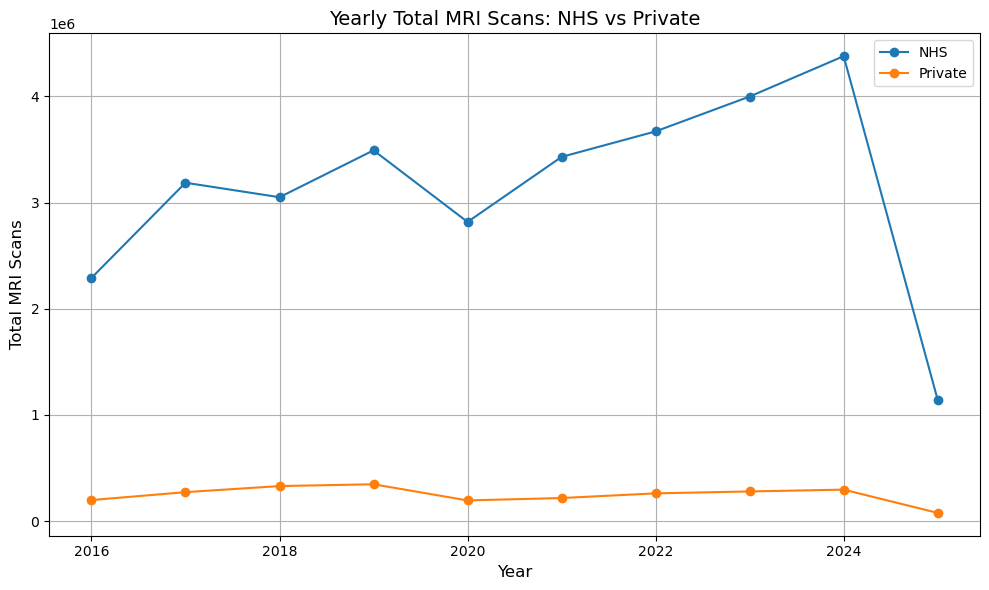

In [8]:

# Group data by year and hospital type, summing MRI scans
yearly_total_mri = (
    df.groupby([df['Date'].dt.year, 'Type of Hospital'])['Total MRI Scans']
          .sum()
          .reset_index()
          .rename(columns={'Date': 'Year'}) # This was wrong earlier; fix below
)

# Actually the year is in the first column, let's rename it properly
yearly_total_mri = yearly_total_mri.rename(columns={'Date': 'Year', 'Date': 'Year'})  # ensure no duplicate confusion
yearly_total_mri = yearly_total_mri.rename(columns={yearly_total_mri.columns[0]: 'Year'})

# Plot yearly trend for NHS vs Private
plt.figure(figsize=(10,6))
for t in ['NHS', 'Private']:
    sub = yearly_total_mri[yearly_total_mri['Type of Hospital'] == t]
    plt.plot(sub['Year'], sub['Total MRI Scans'], marker='o', linestyle='-', label=t)

plt.title("Yearly Total MRI Scans: NHS vs Private", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total MRI Scans", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Monthly MRI growth NHS v/s Private

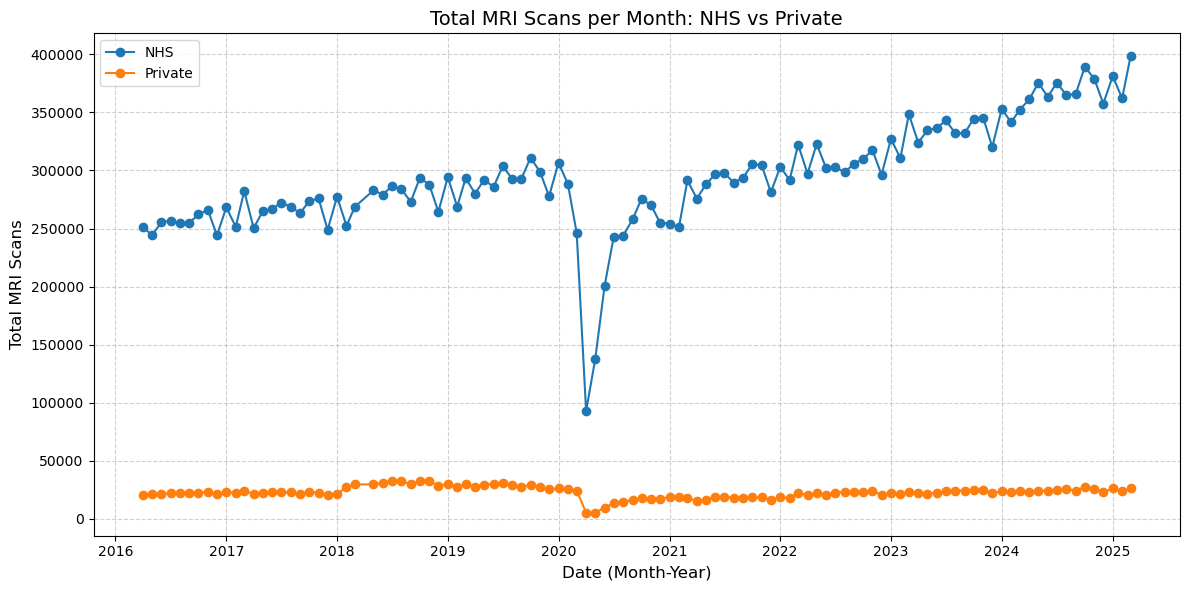

In [13]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Ensure numeric
df['Total MRI Scans'] = pd.to_numeric(df['Total MRI Scans'], errors='coerce')

# Normalize Type of Hospital
df['Type of Hospital'] = df['Type of Hospital'].str.strip().str.title()
df['Type of Hospital'] = df['Type of Hospital'].replace({"Nhs": "NHS", "Private": "Private"})

# Group by month & hospital type
df_grouped = (
    df.groupby([df['Date'].dt.to_period("M"), "Type of Hospital"])['Total MRI Scans']
          .sum()
          .reset_index()
)

# Convert Period to timestamp for plotting
df_grouped['Date'] = df_grouped['Date'].dt.to_timestamp()

# Plot NHS vs Private
plt.figure(figsize=(12,6))
for t in ["NHS", "Private"]:
    sub = df_grouped[df_grouped["Type of Hospital"] == t]
    plt.plot(sub['Date'], sub['Total MRI Scans'], marker='o', linestyle='-', label=t)

plt.title("Total MRI Scans per Month: NHS vs Private", fontsize=14)
plt.xlabel("Date (Month-Year)", fontsize=12)
plt.ylabel("Total MRI Scans", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### No of MRI Scans per Region

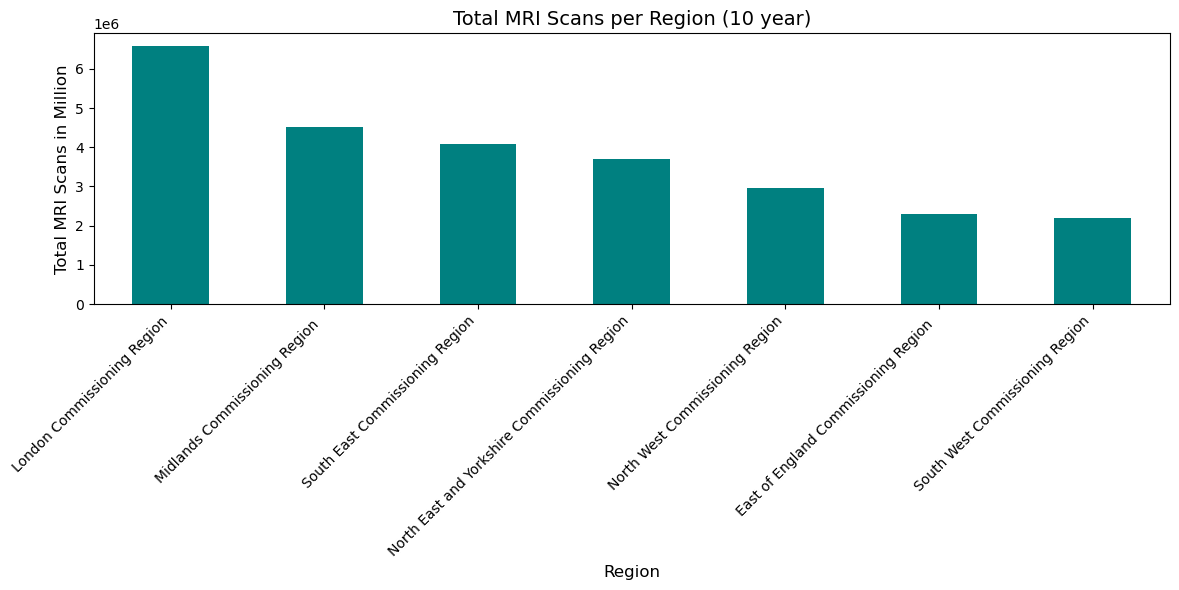

Region Name
London Commissioning Region                      6575860.0
Midlands Commissioning Region                    4505005.0
South East Commissioning Region                  4094730.0
North East and Yorkshire Commissioning Region    3711770.0
North West Commissioning Region                  2970890.0
East of England Commissioning Region             2287105.0
South West Commissioning Region                  2207900.0
Name: Total MRI Scans, dtype: float64

In [9]:
# --- Fill Missing Region Names and Calculate Total MRI per Region ---

# 1. Create mapping of Region -> Region Name from non-missing values
region_mapping = (
    df.dropna(subset=['Region Name'])[['Region', 'Region Name']]
      .drop_duplicates()
      .set_index('Region')['Region Name']
      .to_dict()
)

# 2. Fill missing Region Names using the mapping
df['Region Name'] = df.apply(
    lambda row: region_mapping.get(row['Region'], row['Region Name']),
    axis=1
)

# 3. Calculate total MRI scans per region
region_totals = df.groupby('Region Name')['Total MRI Scans'].sum().sort_values(ascending=False)

# Display result
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
region_totals.plot(kind='bar', color='teal')
plt.title("Total MRI Scans per Region (10 year)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total MRI Scans in Million", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

region_totals


### Total MRI Scan Per Region Nhs v/s Private

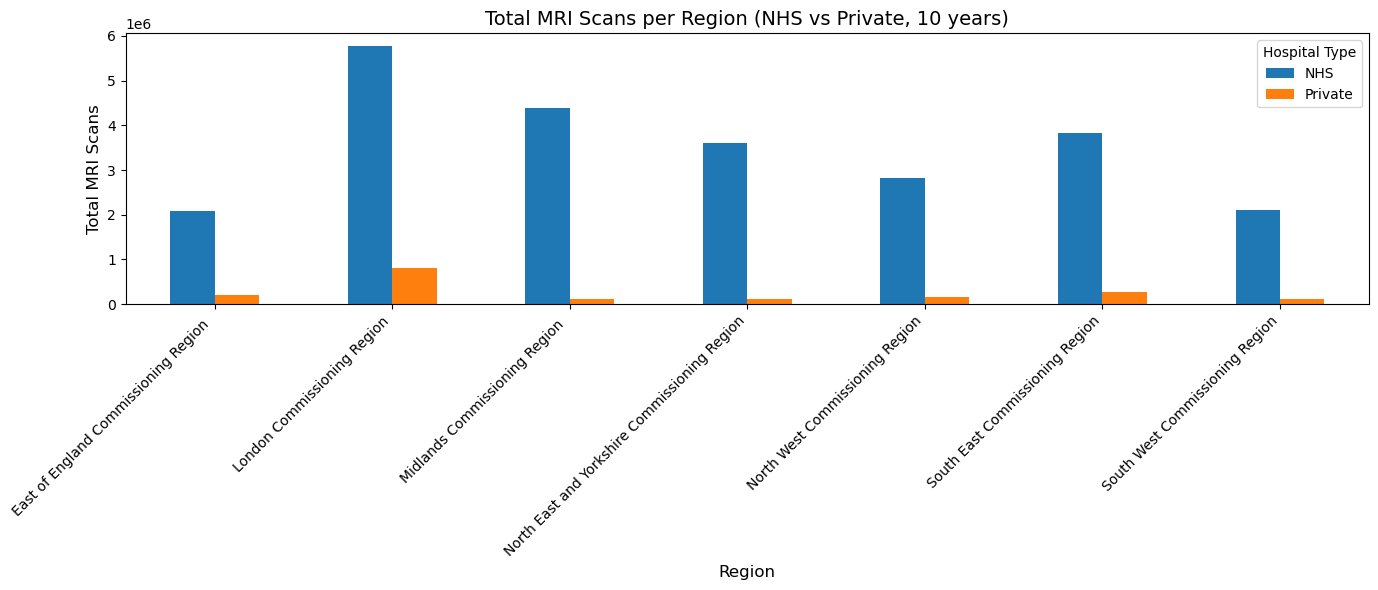

Type of Hospital,NHS,Private
Region Name,,
East of England Commissioning Region,2083915.0,203190.0
London Commissioning Region,5770515.0,805345.0
Midlands Commissioning Region,4379905.0,125100.0
North East and Yorkshire Commissioning Region,3594630.0,117140.0
North West Commissioning Region,2815480.0,155410.0
South East Commissioning Region,3822535.0,272195.0
South West Commissioning Region,2098110.0,109790.0


In [10]:

#  Calculate total MRI scans per region AND hospital type
region_totals = (
    df.groupby(['Region Name', 'Type of Hospital'])['Total MRI Scans']
      .sum()
      .reset_index()
)

#  Pivot to NHS vs Private for side-by-side plotting
pivot_totals = region_totals.pivot(index='Region Name', columns='Type of Hospital', values='Total MRI Scans').fillna(0)

# Plot stacked or side-by-side bars
pivot_totals.plot(kind='bar', figsize=(14,6))
plt.title("Total MRI Scans per Region (NHS vs Private, 10 years)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total MRI Scans", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Hospital Type")
plt.tight_layout()
plt.show()

pivot_totals


## Prostate MRI

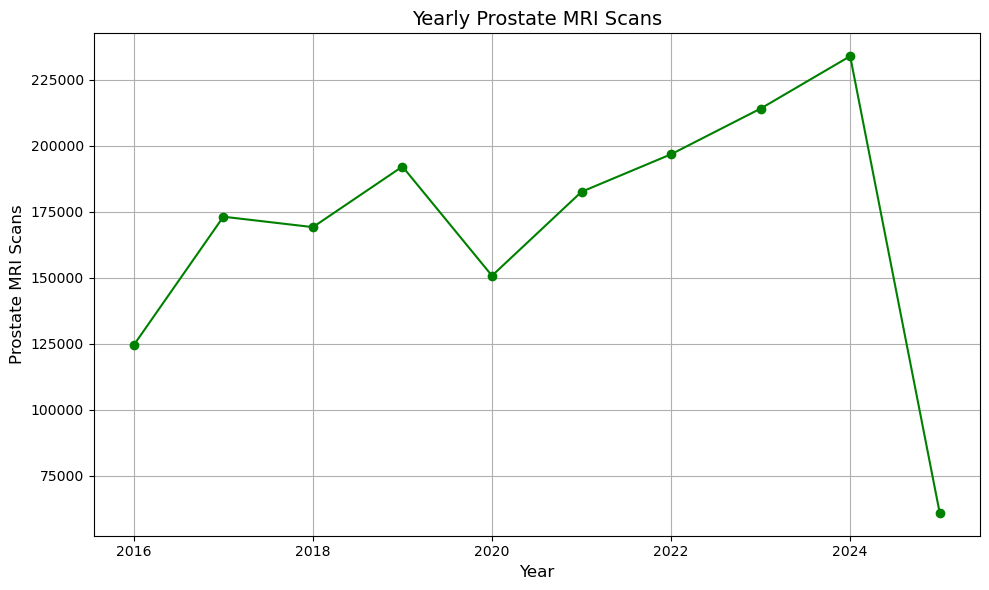

In [6]:
# --- Yearly Prostate MRI Scans ---

# Convert 'Total Prostate MRI' column to numeric
df['Total Prostate MRI'] = pd.to_numeric(df['Total Prostate MRI'], errors='coerce')

# Group data by year and sum the Prostate MRI Scans
yearly_prostate_mri = df.groupby(df['Date'].dt.year)['Total Prostate MRI'].sum()

# Plot the yearly trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_prostate_mri.index, yearly_prostate_mri.values, marker='o', linestyle='-', color='green')
plt.title("Yearly Prostate MRI Scans", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Prostate MRI Scans", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# --- Total Prostate MRI data per region for 2024 ---
# Filter only 2024 data
df_2024 = df[df['Date'].dt.year == 2024].copy()

# Fill missing Region Names (using Provider → Region mapping like before)
provider_region_mapping = (
    df.dropna(subset=['Region Name'])[['Provider name', 'Region Name']]
      .drop_duplicates()
      .set_index('Provider name')['Region Name']
      .to_dict()
)

df_2024['Region Name'] = df_2024.apply(
    lambda row: provider_region_mapping.get(row['Provider name'], row['Region Name']),
    axis=1
)

# Make sure values are numeric
df_2024['Total Prostate MRI'] = pd.to_numeric(df_2024['Total Prostate MRI'], errors='coerce')

# Compute totals by Region Name for 2024 (Prostate MRIs)
region_prostate_totals_2024 = (
    df_2024.groupby('Region Name')['Total Prostate MRI']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Show the table
region_prostate_totals_2024


,Region Name,Total Prostate MRI
0,North East and Yorkshire Commissioning Region,46323
1,Midlands Commissioning Region,45624
2,London Commissioning Region,41826
3,South East Commissioning Region,32942
4,North West Commissioning Region,28378
5,East of England Commissioning Region,20629
6,South West Commissioning Region,18231


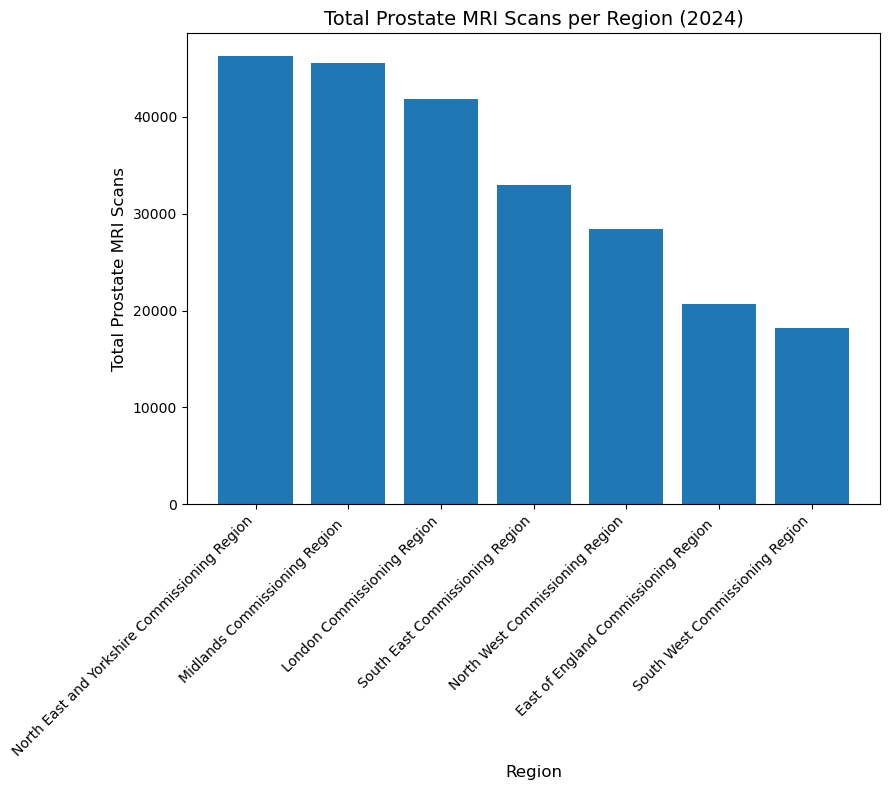

In [12]:
# --- Bar chart for 2024 Prostate MRI totals ---
plt.figure(figsize=(9, 8))
plt.bar(region_prostate_totals_2024["Region Name"],
        region_prostate_totals_2024["Total Prostate MRI"])

plt.title("Total Prostate MRI Scans per Region (2024)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Prostate MRI Scans", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()